In [ ]:
!unzip /content/EE559_Project-main_Final.zip

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
fires_train = pd.read_csv("/content/EE559_Project-main/datasets/algerian_fires_train.csv")
fires_test = pd.read_csv("/content/EE559_Project-main/datasets/algerian_fires_test.csv")

fires_trainx = fires_train.iloc[:,1:-1]
fires_trainy = fires_train.iloc[:,-1]
fires_testx = fires_test.iloc[:,1:-1]
fires_testy = fires_test.iloc[:,-1]

scalar = MinMaxScaler()

fires = scalar.fit_transform(fires_trainx)
firestst = scalar.fit_transform(fires_testx)

In [4]:
fires_train16 = pd.read_csv("/content/EE559_Project-main/datasets/firesfeatures.csv")
fires_test16 = pd.read_csv("/content/EE559_Project-main/datasets/fireststfeatures.csv")


scalar = MinMaxScaler()

fires16 = scalar.fit_transform(fires_train16)
firestst16 = scalar.fit_transform(fires_test16)

In [5]:
def metrics(true_labels, pred_labels, plot_title, work='test'):
    cf_matrix = confusion_matrix(true_labels, pred_labels)
    TP, TN, FP, FN = cf_matrix[1][1], cf_matrix[0][0], cf_matrix[0][1], cf_matrix[1][0]
    Recall = TP/(TP+FN)
    Precision = TP/(TP+FP)
    F1_score = 2*Recall*Precision/(Recall+Precision)
    Accuracy = (TP+TN)/true_labels.shape[0]
    
    if work == 'test':
        ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

        ax.set_title(plot_title)
        ax.set_xlabel('Predicted Values')
        ax.set_ylabel('Actual Values ')

        ax.xaxis.set_ticklabels(['0','1'])
        ax.yaxis.set_ticklabels(['0','1'])

        plt.savefig('/content/EE559_Project-main/cf_matrix_plots/'+plot_title+'.png')

        return F1_score, Accuracy

    else:
        return F1_score, Accuracy, TP, TN, FP, FN

In [6]:
import statsmodels.api as sm
import pandas as pd

X = sm.add_constant(fires_train16)
log_reg = sm.Logit(fires_trainy, X)
log1 = log_reg.fit(method = "cg")
print(log1.summary())

         Current function value: 0.522882
         Iterations: 35
         Function evaluations: 87
         Gradient evaluations: 79
                           Logit Regression Results                           
Dep. Variable:                Classes   No. Observations:                  184
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                           16
Date:                Wed, 04 May 2022   Pseudo R-squ.:                  0.2096
Time:                        01:30:01   Log-Likelihood:                -96.210
converged:                      False   LL-Null:                       -121.73
Covariance Type:            nonrobust   LLR p-value:                 1.566e-05
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -1.99e-05      3.456  -5.76e-06      1.000      -6.7

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Accuracy for train: 0.8967391304347826
--------------------------
[[ 58  11]
 [  8 107]]


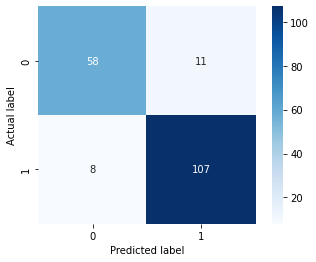

In [7]:
#Taking all features

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix,roc_curve, auc,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

logreg = LogisticRegression()
logreg.fit(fires_train16, fires_trainy)
Y_pred = logreg.predict(fires_train16)
val=logreg.score(fires_train16,fires_trainy)
print("Accuracy for train:",val)
print("--------------------------")
conf_matrix = confusion_matrix(fires_trainy, Y_pred)
sns.heatmap(conf_matrix, annot=True, square=True, cmap='Blues', fmt="d", cbar=True)
print(conf_matrix)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

Train Logistic regression F1_score= 0.9184549356223176 Train Logistic regression Accuracy= 0.8967391304347826


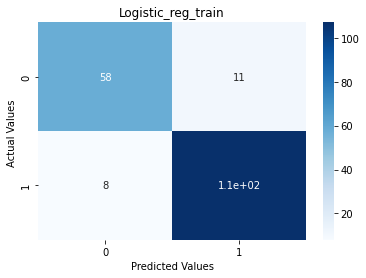

In [8]:
F1_score, Accuracy = metrics(fires_trainy,Y_pred, "Logistic_reg_train")
print("Train Logistic regression F1_score=", F1_score, "Train Logistic regression Accuracy=", Accuracy)

Accuracy for test: 0.85
--------------------------
[[34  3]
 [ 6 17]]


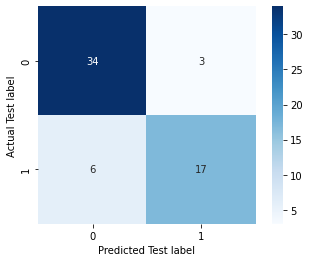

In [9]:
#Taking all features
Y_predtst = logreg.predict(fires_test16)
val=logreg.score(fires_test16,fires_testy)
print("Accuracy for test:",val)
print("--------------------------")
conf_matrix = confusion_matrix(fires_testy, Y_predtst)
sns.heatmap(conf_matrix, annot=True, square=True, cmap='Blues', fmt="d", cbar=True)
print(conf_matrix)
plt.ylabel('Actual Test label');
plt.xlabel('Predicted Test label');

Test Logistic regression F1_score= 0.7906976744186046 Test Logistic regression Accuracy= 0.85


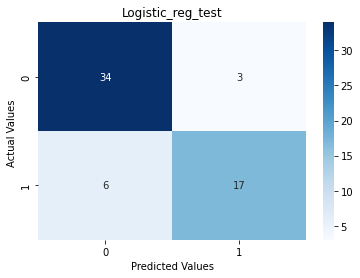

In [10]:
F1_score, Accuracy = metrics(fires_testy,Y_predtst, "Logistic_reg_test")
print("Test Logistic regression F1_score=", F1_score, "Test Logistic regression Accuracy=", Accuracy)


>If our p value is less than 0.05 then we reject the null hypothesis 
And if you see we are getting a p value of 0.00, that means the 'ISI' is the best feature for the calculation so we will drop the others and predict logistic regression on just ISI Feature and See what it results.